# Ground Truth from Stand-Up Comedy Transcripts

### 1. Seperate the transcript into individual sentences and map the timestamps of the audio with the sentences

Forced Alignment was done via the aid of Aeneas

### 2. Use Laughter Detection Tool to find the laughter in the given audio

Laughter Detection is Done via

https://colab.research.google.com/drive/1ixYPfET1HXgxr2K1SjgYY11-BKu7u_UZ?usp=sharing&pli=1&authuser=2#scrollTo=R3LqFPm9biYP

https://colab.research.google.com/drive/1ixYPfET1HXgxr2K1SjgYY11-BKu7u_UZ#scrollTo=R3LqFPm9biYP

### 3. Match the funny sentences with the laughter

In [ ]:
import json

In [ ]:
dg_laugh_times = {
    'laugh_0': {'start': 14.268125337655322, 'end': 19.352169998199173},
    'laugh_1': {'start': 33.29229245452908, 'end': 34.18258598955519},
    'laugh_2': {'start': 37.7906176841347, 'end': 53.44104087880425},
    'laugh_3': {'start': 68.88060507833603, 'end': 73.82407707545471},
    'laugh_4': {'start': 85.49160813974429, 'end': 88.60763551233568},
    'laugh_5': {'start': 93.05910318746623, 'end': 93.8322528363047},
    'laugh_6': {'start': 107.8426616243472, 'end': 110.95868899693859},
    'laugh_7': {'start': 115.01186745903115, 'end': 116.18330632090762}
}

In [ ]:
def create_laughter_map(laugh_times, transcript_data_path):
    with open(transcript_data_path, 'r') as file:
        transcript_data = json.load(file)

    laughter_map = {}
    used_sentences = set()
    i = 1

    for laugh_info in laugh_times.values():
        funny_sent = []
        laugh_start = laugh_info['start']
        laugh_end = laugh_info['end']
        for fragment in transcript_data["fragments"]:
            start_frag = float(fragment['begin'])
            end_frag = float(fragment['end'])
            if end_frag < laugh_start:
                sentences = " ".join(fragment['lines']).strip()
                if sentences and sentences not in used_sentences:
                    funny_sent.append(sentences)
                    used_sentences.add(sentences)
                if len(funny_sent) > 2:
                    funny_sent.pop(0)
        funny_sent_comb = " ".join(funny_sent)
        if funny_sent_comb:
            laughter_map[f"laugh {i}"] = [laugh_start, laugh_end, funny_sent_comb]
            i += 1

    return laughter_map

In [ ]:
dg_laughter_map = create_laughter_map(dg_laugh_times, "/content/dg_output.json")

for laugh_num, info in dg_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 14.268125337655322
End Time: 19.352169998199173
Funny Sentences: I was babysitting this kid once, this mean kid, and I remember the first time I saw him, I opened the door and there were tears streaming down his face, tears streaming down his face, but he wasn't crying. He wasn't crying.

laugh 2
Start Time: 33.29229245452908
End Time: 34.18258598955519
Funny Sentences: The sweetest thing he was allowed was mints. He was just allowed to have mints.

laugh 3
Start Time: 37.7906176841347
End Time: 53.44104087880425
Funny Sentences: So he would steal mints by the handful.

laugh 4
Start Time: 68.88060507833603
End Time: 73.82407707545471
Funny Sentences: And I would take him to the park and I was the only boy there, you know, I was hanging out. You know, they were cool.

laugh 5
Start Time: 85.49160813974429
End Time: 88.60763551233568
Funny Sentences: You know, we'd trade jerk- chicken recipes and stuff.

laugh 6
Start Time: 93.05910318746623
End Time: 93.832252836304

In [ ]:
dg_funny_sentences = []
for value in dg_laughter_map.values():
  dg_funny_sentences.append(value[2])

for sentences in dg_funny_sentences:
  print(sentences, "\n")

I was babysitting this kid once, this mean kid, and I remember the first time I saw him, I opened the door and there were tears streaming down his face, tears streaming down his face, but he wasn't crying. He wasn't crying. 

The sweetest thing he was allowed was mints. He was just allowed to have mints. 

So he would steal mints by the handful. 

And I would take him to the park and I was the only boy there, you know, I was hanging out. You know, they were cool. 

You know, we'd trade jerk- chicken recipes and stuff. 

And he... he was just a mean-spirited kid, like, he kind Of... Like, he watched HBO just a little too early and was just kind of a mean kid in general, so he would just come through and just...He wanted to get to his slide, so he just pushed over this little girl, she fell over, and her Trinidadian babysitter comes over and goes, "Hey! 

And he goes, "Shut up." And she goes, "Don't you talk to me like that, I am a grown-up, you will respect me." 

And he goes, "Suck my 

In [ ]:
def make_sent_list(laughter_map):
  sentences = []
  for value in laughter_map.values():
    sentences.append(value[2])
  return sentences

### 3. Amplitude graph

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_mp3(audio, name):
  data, sr = librosa.load(audio, sr=None)

  time = np.arange(len(data)) / sr
  plt.figure(figsize=(14, 5))
  plt.plot(time, data, color="pink")
  plt.title(f"Waveform of {name} Transcript")
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.show()

In [ ]:
dg_audio = "/content/DG_W_audio_11.mp3"

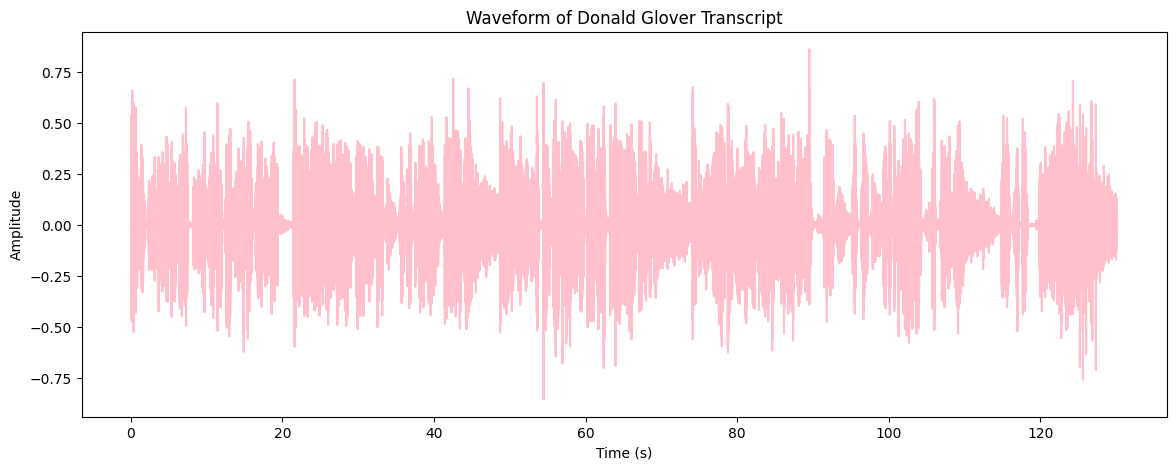

In [ ]:
plot_mp3(dg_audio, "Donald Glover")

In [ ]:
def plot_mp3_laugh_start(audio, name, laughter_map):
    data, sr = librosa.load(audio, sr=None)
    time = np.arange(len(data)) / sr
    plt.figure(figsize=(14, 5))
    plt.plot(time, data, color="pink")
    for info in laughter_map.values():
        plt.axvline(x=info[0], color='blue', linestyle='--', linewidth=1)
        plt.axvline(x=info[1], color='red', linestyle='--', linewidth=1)

    plt.title(f"Waveform of {name} Transcript")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

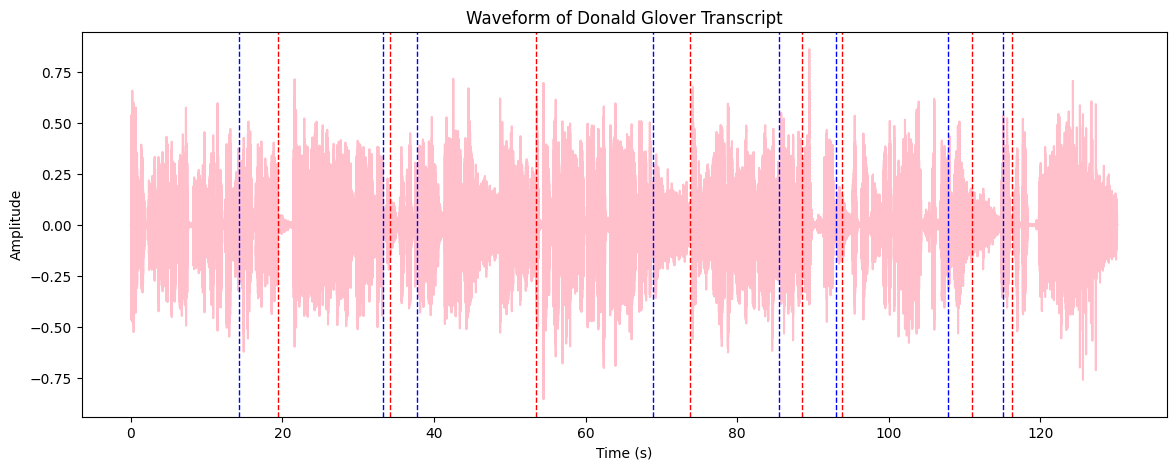

In [ ]:
plot_mp3_laugh_start(dg_audio, "Donald Glover", dg_laughter_map)

In [ ]:
# from pydub import AudioSegment

# # Load the audio file
# audio = AudioSegment.from_file(dg_audio, format="mp3")

# # Function to extract and concatenate the laughter segments
# def extract_laughter_segments(audio, laughter_segments):
#     laughter_audio = AudioSegment.empty()
#     for start, end in laughter_segments.values():
#         laughter_audio += audio[start:end]
#     return laughter_audio

# # Example laughter segments dictionary (replace this with your actual dictionary)
# # It should contain start and end times for each laughter segment
# laughter_segments = {
#     "laughter1": (1000, 2000),
#     "laughter2": (3000, 4000)
# }

# # Extract and concatenate the laughter segments
# laughter_only_audio = extract_laughter_segments(audio, laughter_segments)

# # Export the concatenated laughter audio
# laughter_only_audio.export("laughter_only_audio.mp3", format="mp3")


In [ ]:
def split_sentence(sentence, max_length=80):
    lines = []
    while len(sentence) > max_length:
        split_index = sentence.rfind(' ', 0, max_length)
        if split_index == -1:

            split_index = max_length
        lines.append(sentence[:split_index].strip())
        sentence = sentence[split_index:].strip()
    lines.append(sentence)
    return lines

def plot_mp3_laugh_sent(audio, name, laughter_map, sentences):
    data, sr = librosa.load(audio, sr=None)
    time = np.arange(len(data)) / sr
    plt.figure(figsize=(14, 5))
    plt.plot(time, data, color="pink")

    for info in laughter_map.values():
        start = info[0]
        end = info[1]
        sentence = info[2]
        if start != list(laughter_map.keys())[-1]:
            lines = split_sentence(sentence)
            label_text = '\n'.join(lines)
            plt.text(start, np.min(data) - 0.1 * (np.max(data) - np.min(data)), label_text, rotation=90, verticalalignment='top', horizontalalignment='center', fontsize=8)
        else:
            plt.text(start, np.min(data) - 0.1 * (np.max(data) - np.min(data)), sentence, rotation=90, verticalalignment='top', horizontalalignment='center', fontsize=8)

        plt.axvline(x=start, color='blue', linestyle='--', linewidth=1)
        plt.axvline(x=end, color='green', linestyle=':', linewidth=1)

    plt.title(f"Waveform of {name} Transcript")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

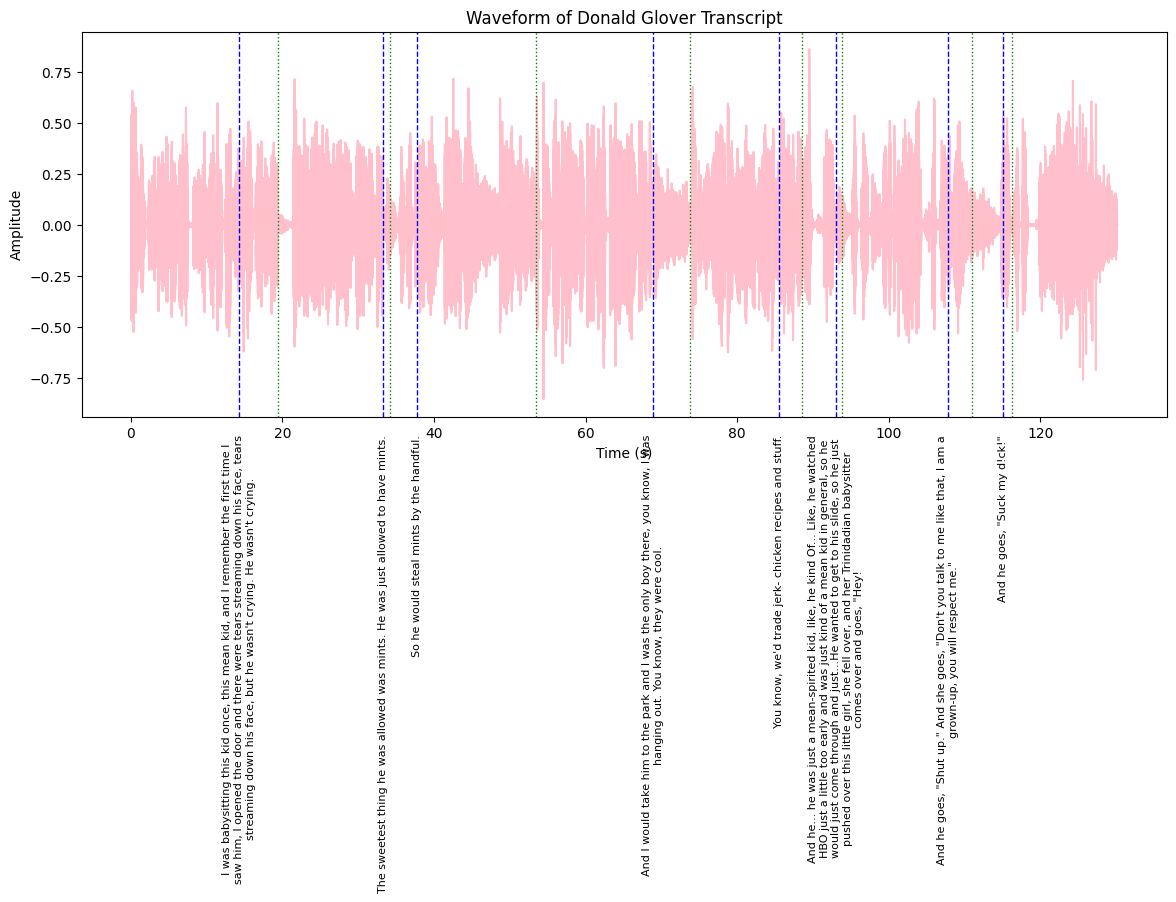

In [ ]:
plot_mp3_laugh_sent(dg_audio, "Donald Glover", dg_laughter_map, sentences)

## Anthony Jeselnik

In [ ]:
aj_laugh_times = {
    "laugh_1": {'start': 0.0, 'end': 1.1484084880636605},
    "laugh_2": {'start': 9.796627510420615, 'end': 10.57004547176961},
    "laugh_3": {'start': 16.898010610079577, 'end': 19.405759757483896},
    "laugh_4": {'start': 23.78846153846154, 'end': 25.54622963243653},
    "laugh_5": {'start': 29.08520272830618, 'end': 31.1007768093975},
    "laugh_6": {'start': 34.87411898446381, 'end': 36.23345964380447},
    "laugh_7": {'start': 43.756707086017435, 'end': 48.91282682834407},
    "laugh_8": {'start': 86.5056271314892, 'end': 88.49776430466086},
    "laugh_9": {'start': 93.98200075786283, 'end': 100.70839333080713},
    "laugh_10": {'start': 114.65335354300872, 'end': 120.2782114437287}
}

In [ ]:
aj_laughter_map = create_laughter_map(aj_laugh_times, "/content/aj_output.json")

for laugh_num, info in aj_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 9.796627510420615
End Time: 10.57004547176961
Funny Sentences: When I was a kid, I used to fantasize about getting older, growing up and having money, and buying my mom nice things for her birthday. When I was a kid, we were poor.

laugh 2
Start Time: 23.78846153846154
End Time: 25.54622963243653
Funny Sentences: So poor I remember, just so I could go to my senior prom, just so I could go to my senior prom, I had to sell my U.S. passport on the street.

laugh 3
Start Time: 29.08520272830618
End Time: 31.1007768093975
Funny Sentences: Sold my passport on the street for 300 bucks to get to go to my prom. Of course this was before 9/11 so... my bad, everybody.

laugh 4
Start Time: 34.87411898446381
End Time: 36.23345964380447
Funny Sentences: Weird joke to clap for, but sure.

laugh 5
Start Time: 43.756707086017435
End Time: 48.91282682834407
Funny Sentences: My mom actually should've been on one of the planes that crashed on 9/11.

laugh 6
Start Time: 86.5056271314892

In [ ]:
aj_sentences = make_sent_list(aj_laughter_map)
print(aj_sentences)

['When I was a kid, I used to fantasize about getting older, growing up and having money, and buying my mom nice things for her birthday. When I was a kid, we were poor.', 'So poor I remember, just so I could go to my senior prom, just so I could go to my senior prom, I had to sell my U.S. passport on the street.', 'Sold my passport on the street for 300 bucks to get to go to my prom. Of course this was before 9/11 so... my bad, everybody.', 'Weird joke to clap for, but sure.', "My mom actually should've been on one of the planes that crashed on 9/11.", 'And when I did that, my mom would act weird. She\'d pull me aside and say, "Anthony, who\'s your new friend?', 'And I would say, "Shut up, Mom, that\'s racist. Put your money away.', "And we never talk, write letters or any of that shit. 'Cause they're all in jail for the exact same thing."]


In [ ]:
aj_audio = "/content/AJ_TP_audio_15.mp3"

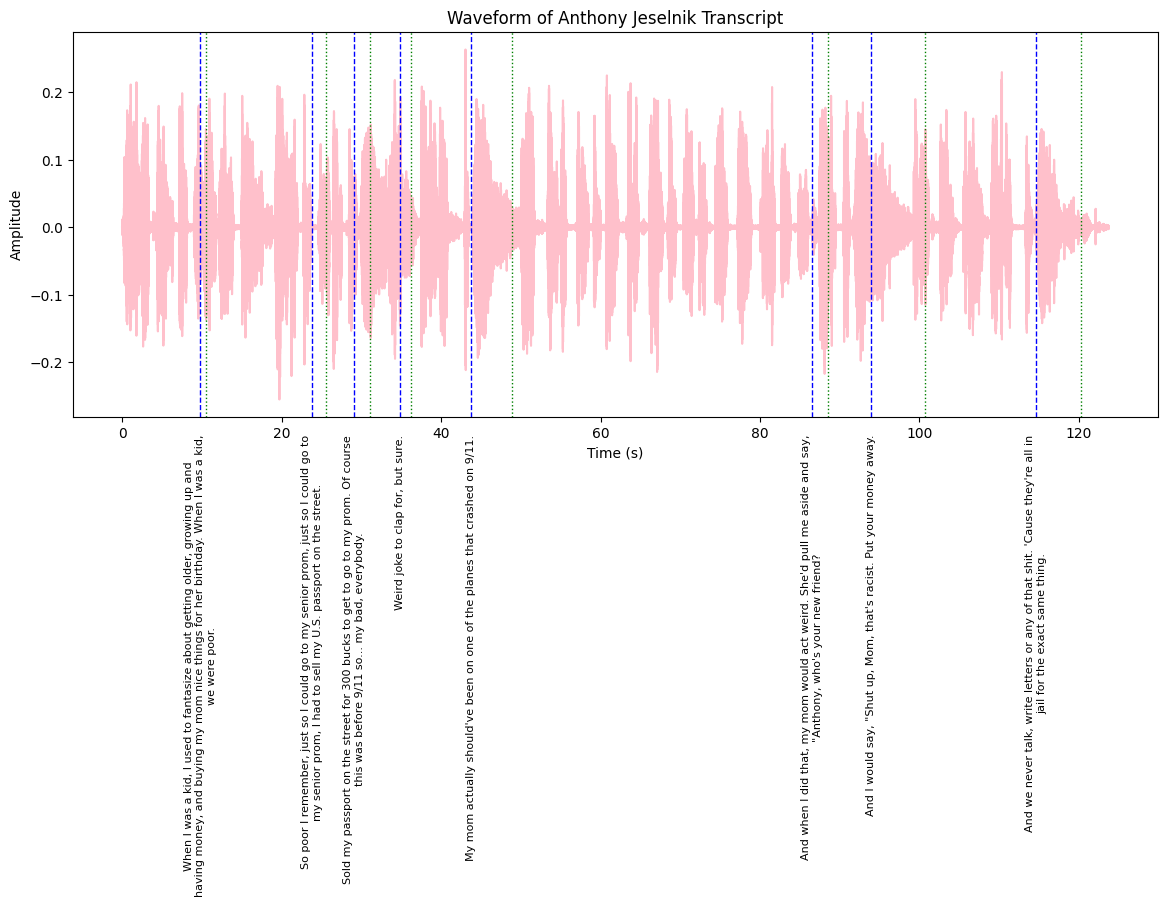

In [ ]:
plot_mp3_laugh_sent(aj_audio, "Anthony Jeselnik", aj_laughter_map, aj_sentences)

Chelsea Peretti: One of the Greats

In [ ]:
cp_laugh_times = {
    "laugh_1": {'start': 0.0, 'end': 1.1754617414248019},
    "laugh_2": {'start': 7.875593667546173, 'end': 9.262638522427439},
    "laugh_3": {'start': 13.212189973614773, 'end': 18.87791556728232},
    "laugh_4": {'start': 24.966807387862794, 'end': 28.352137203166222},
    "laugh_5": {'start': 29.574617414248017, 'end': 32.654327176780996},
    "laugh_6": {'start': 39.63656992084432, 'end': 42.48118733509234},
    "laugh_7": {'start': 59.00817941952506, 'end': 67.30693931398416},
    "laugh_8": {'start': 69.09364116094986, 'end': 72.4554617414248},
    "laugh_9": {'start': 74.38321899736147, 'end': 88.4887598944591}
}

In [ ]:
cp_laughter_map = create_laughter_map(cp_laugh_times, "/content/cp_output.json")

for laugh_num, info in cp_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 7.875593667546173
End Time: 9.262638522427439
Funny Sentences: A friend of a friend just posted like 500 engagement photos on Facebook. It was a photoset of 500 photos.

laugh 2
Start Time: 13.212189973614773
End Time: 18.87791556728232
Funny Sentences: I'm not exaggerating.

laugh 3
Start Time: 24.966807387862794
End Time: 28.352137203166222
Funny Sentences: I'm just obsessed with the entire photoset. I'm just like, "Next, next, next, next, more, more, more, more."

laugh 4
Start Time: 39.63656992084432
End Time: 42.48118733509234
Funny Sentences: Every photo, they were just like... [giggles shrilly] "Uh-oh, it's us again." [trills] This same girl on Facebook, all her posts and all her updates are about her husband.

laugh 5
Start Time: 59.00817941952506
End Time: 67.30693931398416
Funny Sentences: She calls him by a word that I really feel is one of the more disgusting words in the English language. She calls him her "hubby," which, to me is on par with the "N" wo

In [ ]:
cp_sentences = make_sent_list(cp_laughter_map)
print(cp_sentences)

['A friend of a friend just posted like 500 engagement photos on Facebook. It was a photoset of 500 photos.', "I'm not exaggerating.", 'I\'m just obsessed with the entire photoset. I\'m just like, "Next, next, next, next, more, more, more, more."', 'Every photo, they were just like... [giggles shrilly] "Uh-oh, it\'s us again." [trills] This same girl on Facebook, all her posts and all her updates are about her husband.', 'She calls him by a word that I really feel is one of the more disgusting words in the English language. She calls him her "hubby," which, to me is on par with the "N" word.', 'My hubby fixed the door. My hubby is sleeping.', 'He breathed in, he breathed out. He breathed in, he breathed out."']


In [ ]:
cp_audio = "/content/CP_OTG_audio_18.mp3"

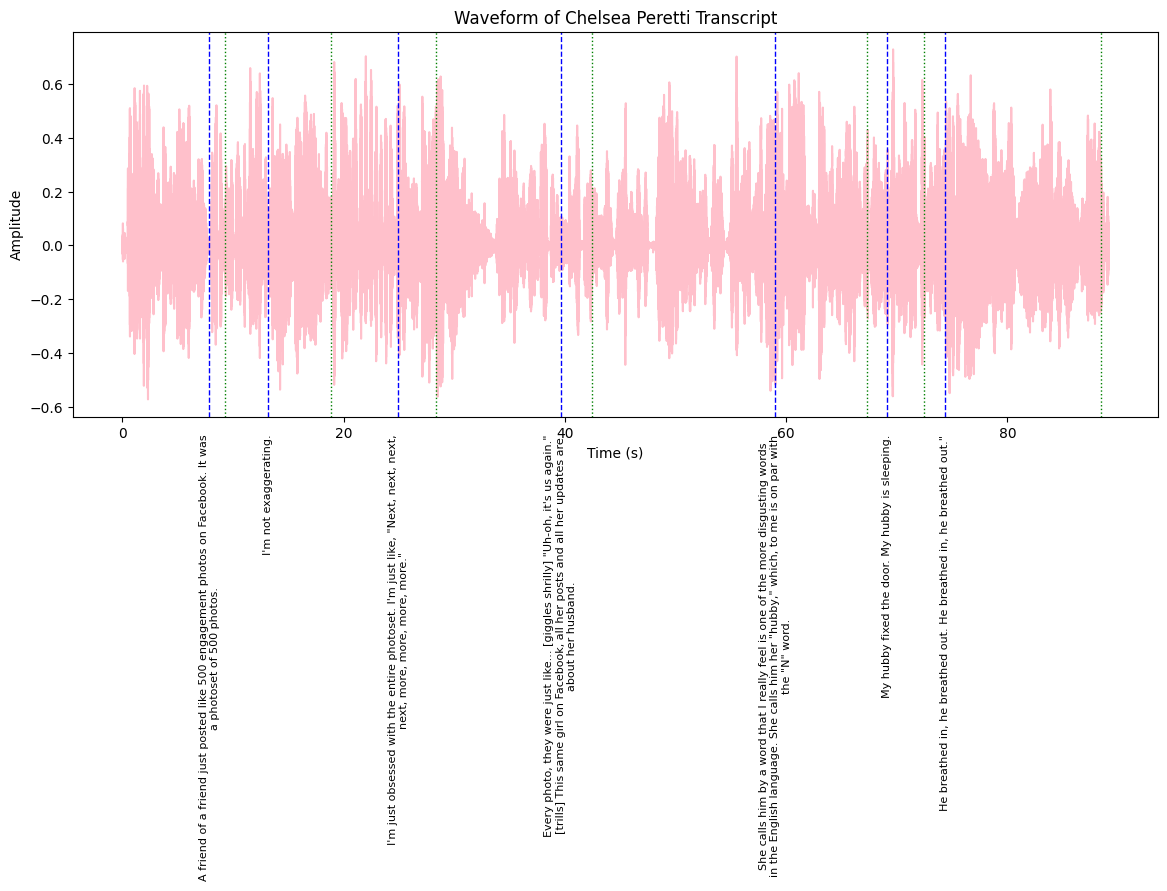

In [ ]:
plot_mp3_laugh_sent(cp_audio, "Chelsea Peretti", cp_laughter_map, cp_sentences)

Louis C.K

In [ ]:
lck_laugh_times = {
    "laugh_1": {'start': 0.0, 'end': 0.5893960192175703},
    "laugh_2": {'start': 3.206314344543583, 'end': 4.668016472203157},
    "laugh_3": {'start': 17.375394646533973, 'end': 20.77031571722718},
    "laugh_4": {'start': 31.709505833905286, 'end': 41.44632807137955},
    "laugh_5": {'start': 45.124159231297185, 'end': 48.943445435827044},
    "laugh_6": {'start': 49.34423472889499, 'end': 55.403225806451616},
    "laugh_7": {'start': 57.94941660947152, 'end': 64.03198352779684},
    "laugh_8": {'start': 65.54083733699383, 'end': 67.37975291695264}
}

In [ ]:
lck_laughter_map = create_laughter_map(lck_laugh_times, "/content/lck_output.json")

for laugh_num, info in lck_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 17.375394646533973
End Time: 20.77031571722718
Funny Sentences: Jesus was Jewish. And he said, "I don't think so."

laugh 2
Start Time: 31.709505833905286
End Time: 41.44632807137955
Funny Sentences: He was like, "Dude, Jesus couldn't be Jewish. Think about it."

laugh 3
Start Time: 45.124159231297185
End Time: 48.943445435827044
Funny Sentences: What was he? Catholic?

laugh 4
Start Time: 49.34423472889499
End Time: 55.403225806451616
Funny Sentences: Okay, Jesus was Catholic and he had a gold chain with a cross.

laugh 5
Start Time: 57.94941660947152
End Time: 64.03198352779684
Funny Sentences: "That finally makes sense. I didn't even know.

laugh 6
Start Time: 65.54083733699383
End Time: 67.37975291695264
Funny Sentences: Oh, fuck, that's me!



In [ ]:
lck_sentences = make_sent_list(lck_laughter_map)
print(lck_sentences)

['Jesus was Jewish. And he said, "I don\'t think so."', 'He was like, "Dude, Jesus couldn\'t be Jewish. Think about it."', 'What was he? Catholic?', 'Okay, Jesus was Catholic and he had a gold chain with a cross.', '"That finally makes sense. I didn\'t even know.', "Oh, fuck, that's me!"]


In [ ]:
lck_audio = "/content/LCK_SY_audio_06.mp3"

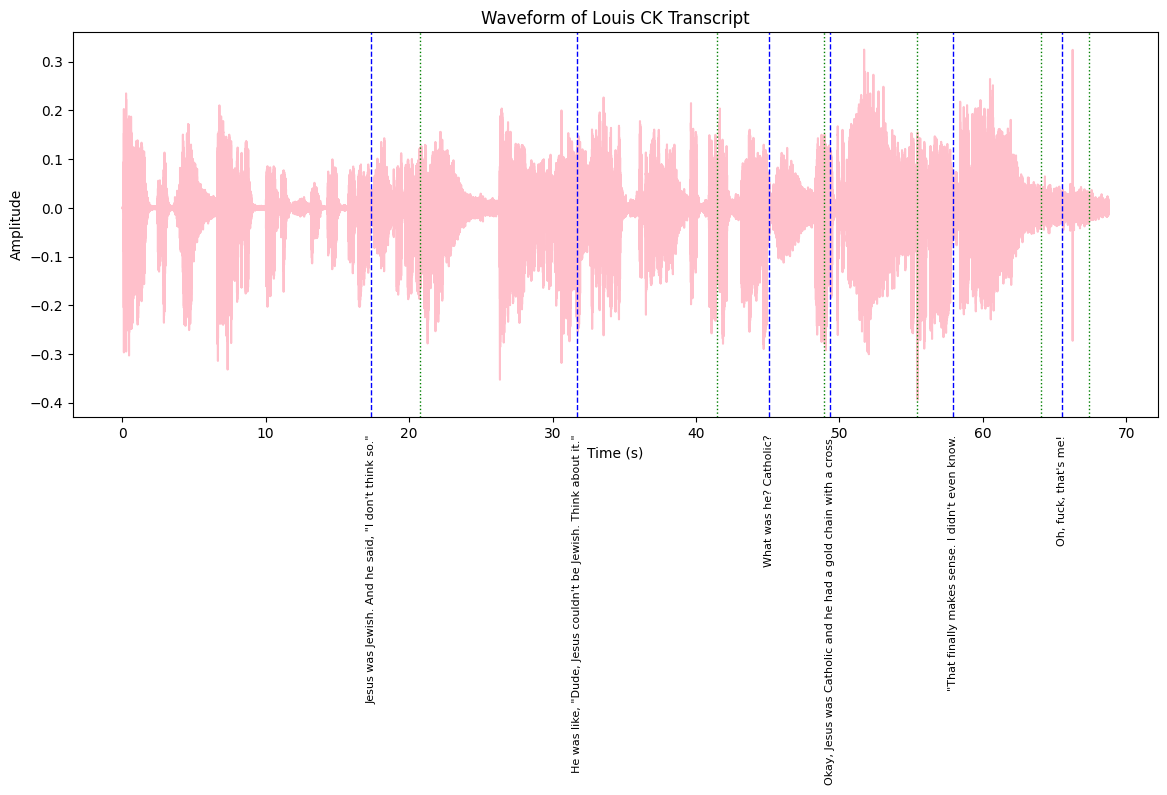

In [ ]:
plot_mp3_laugh_sent(lck_audio, "Louis CK", lck_laughter_map, lck_sentences)

John Mulaney

In [ ]:
jm_laugh_times = {
    "laugh_1": {'start': 1.9682337516388835, 'end': 5.389211462820752},
    "laugh_2": {'start': 14.457145532871323, 'end': 15.933320846600486},
    "laugh_3": {'start': 23.946843978273083, 'end': 26.87576325154523},
    "laugh_4": {'start': 32.54615096460011, 'end': 40.02075294999063},
    "laugh_5": {'start': 41.33290878441655, 'end': 55.48544671286757},
    "laugh_6": {'start': 59.49220827870387, 'end': 65.86553661734406},
    "laugh_7": {'start': 67.85720172316913, 'end': 70.7626896422551},
    "laugh_8": {'start': 73.527589436224, 'end': 74.20709870762315},
    "laugh_9": {'start': 76.76111631391646, 'end': 77.55778235624648},
    "laugh_10": {'start': 83.9076793407005, 'end': 85.89934444652556},
    "laugh_11" :{'start': 87.77385278141973, 'end': 89.20316538677653},
    "laugh_12": {'start': 97.75560966473121, 'end': 105.9800149840794},
    "laugh_13": {'start': 108.97922831991008, 'end': 112.16589248923017},
    "laugh_14": {'start': 113.78265592807641, 'end': 125.07656864581381}
}

In [ ]:
jm_laughter_map = create_laughter_map(jm_laugh_times, "/content/jm_output.json")

for laugh_num, info in jm_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 14.457145532871323
End Time: 15.933320846600486
Funny Sentences: My wife and I just gave a bunch of stuff to Goodwill. We were moving apartments, we had a bunch of clothes and furniture, so we made a whole day out of it.

laugh 2
Start Time: 23.946843978273083
End Time: 26.87576325154523
Funny Sentences: We made these big piles of clothes, we put the piles into these big boxes, then we put the boxes into the back of my car, and then they stayed there for four months.

laugh 3
Start Time: 32.54615096460011
End Time: 40.02075294999063
Funny Sentences: And I said, "Of course I did! On an unrelated note, I'm going to walk out the front door right now."

laugh 4
Start Time: 41.33290878441655
End Time: 55.48544671286757
Funny Sentences: It was charitable, but it was also fast and violent, because I was throwing boxes at people. The boxes were so heavy I couldn't even say what was in them.

laugh 5
Start Time: 59.49220827870387
End Time: 65.86553661734406
Funny Sentences: 

In [ ]:
print(jm_laughter_map)

{'laugh 1': [14.457145532871323, 15.933320846600486, 'My wife and I just gave a bunch of stuff to Goodwill. We were moving apartments, we had a bunch of clothes and furniture, so we made a whole day out of it.'], 'laugh 2': [23.946843978273083, 26.87576325154523, 'We made these big piles of clothes, we put the piles into these big boxes, then we put the boxes into the back of my car, and then they stayed there for four months.'], 'laugh 3': [32.54615096460011, 40.02075294999063, 'And I said, "Of course I did! On an unrelated note, I\'m going to walk out the front door right now."'], 'laugh 4': [41.33290878441655, 55.48544671286757, "It was charitable, but it was also fast and violent, because I was throwing boxes at people. The boxes were so heavy I couldn't even say what was in them."], 'laugh 5': [59.49220827870387, 65.86553661734406, 'He\'s like, "Take this receipt for the clothing for your taxes." How do I write that on my taxes?'], 'laugh 6': [67.85720172316913, 70.7626896422551, 

In [ ]:
jm_sentences = make_sent_list(jm_laughter_map)
print(jm_sentences)

['My wife and I just gave a bunch of stuff to Goodwill. We were moving apartments, we had a bunch of clothes and furniture, so we made a whole day out of it.', 'We made these big piles of clothes, we put the piles into these big boxes, then we put the boxes into the back of my car, and then they stayed there for four months.', 'And I said, "Of course I did! On an unrelated note, I\'m going to walk out the front door right now."', "It was charitable, but it was also fast and violent, because I was throwing boxes at people. The boxes were so heavy I couldn't even say what was in them.", 'He\'s like, "Take this receipt for the clothing for your taxes." How do I write that on my taxes?', 'My mom said it could be a sleep shirt. Please deduct this from my 2017 income."', 'That sleep shirt bullshit.', '"Well, if it\'s too big you can just wear it as a sleep shirt."', "No, I get that, Mom, but why don't we just tell our relatives that I'm a four-year-old boy and I don't wear a man's XXL T-shir

In [ ]:
jm_audio = "/content/JM_KDRC_audio_12.mp3"

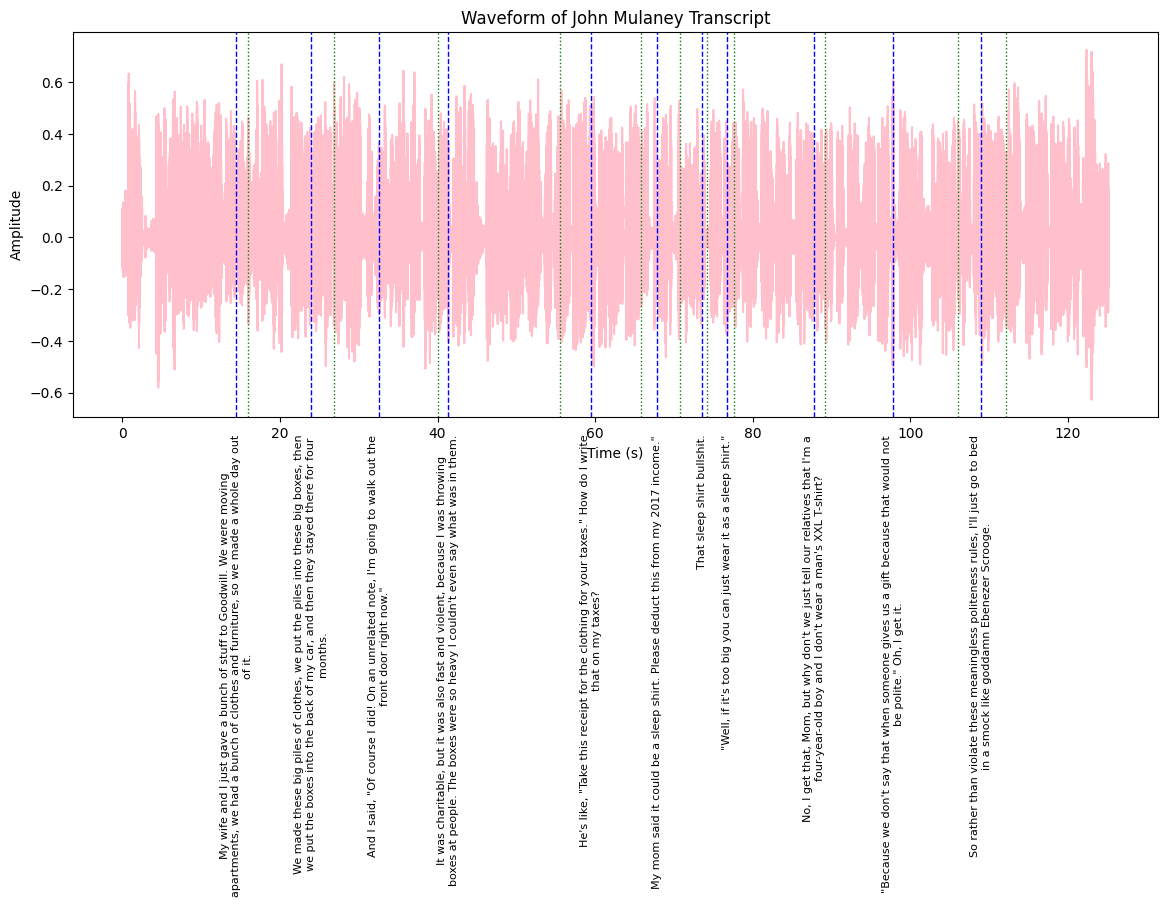

In [ ]:
plot_mp3_laugh_sent(jm_audio, "John Mulaney", jm_laughter_map, jm_sentences)

## Create Pandas Data

In [ ]:
import pandas as pd

In [82]:
combined_data = {}
i = 1
for comedian, info in [("Donald_Glover", dg_laughter_map), ("Anthony_Jeselnik", aj_laughter_map), ("Chelsea_Peretti", cp_laughter_map), ("Louis_CK", lck_laughter_map), ("John_Mulaney", jm_laughter_map)]:
  for key, value in info.items():
    combined_data[i] = [comedian, value[0], value[1], value[2]]
    i+=1

In [84]:
for key, value in combined_data.items():
  print(key, value)

1 ['Donald_Glover', 14.268125337655322, 19.352169998199173, "I was babysitting this kid once, this mean kid, and I remember the first time I saw him, I opened the door and there were tears streaming down his face, tears streaming down his face, but he wasn't crying. He wasn't crying."]
2 ['Donald_Glover', 33.29229245452908, 34.18258598955519, 'The sweetest thing he was allowed was mints. He was just allowed to have mints.']
3 ['Donald_Glover', 37.7906176841347, 53.44104087880425, 'So he would steal mints by the handful.']
4 ['Donald_Glover', 68.88060507833603, 73.82407707545471, 'And I would take him to the park and I was the only boy there, you know, I was hanging out. You know, they were cool.']
5 ['Donald_Glover', 85.49160813974429, 88.60763551233568, "You know, we'd trade jerk- chicken recipes and stuff."]
6 ['Donald_Glover', 93.05910318746623, 93.8322528363047, 'And he... he was just a mean-spirited kid, like, he kind Of... Like, he watched HBO just a little too early and was just

In [85]:
stand_up_data = pd.DataFrame(list(combined_data.values()), columns=['comedian', 'laugh_start', 'laugh_end', 'sentence'])
print(stand_up_data)

            comedian  laugh_start   laugh_end  \
0      Donald_Glover    14.268125   19.352170   
1      Donald_Glover    33.292292   34.182586   
2      Donald_Glover    37.790618   53.441041   
3      Donald_Glover    68.880605   73.824077   
4      Donald_Glover    85.491608   88.607636   
5      Donald_Glover    93.059103   93.832253   
6      Donald_Glover   107.842662  110.958689   
7      Donald_Glover   115.011867  116.183306   
8   Anthony_Jeselnik     9.796628   10.570045   
9   Anthony_Jeselnik    23.788462   25.546230   
10  Anthony_Jeselnik    29.085203   31.100777   
11  Anthony_Jeselnik    34.874119   36.233460   
12  Anthony_Jeselnik    43.756707   48.912827   
13  Anthony_Jeselnik    86.505627   88.497764   
14  Anthony_Jeselnik    93.982001  100.708393   
15  Anthony_Jeselnik   114.653354  120.278211   
16   Chelsea_Peretti     7.875594    9.262639   
17   Chelsea_Peretti    13.212190   18.877916   
18   Chelsea_Peretti    24.966807   28.352137   
19   Chelsea_Peretti

In [87]:
stand_up_data.to_csv('standup_data.csv', index=False)